## Importing Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn import tree

pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',250)
pd.set_option('display.float.format',lambda x:'%.5f'%x)

C:\Users\mybes\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%%capture
!pip install imblearn

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import BorderlineSMOTE
#from imblearn.over_sampling import SVMSMOTE
#from imblearn.over_sampling import KMeansSMOTE

## Data Loading:

In [3]:
df=pd.read_csv('parkinsons_data.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.41478,0.81529,-4.81303,0.26648,2.30144,0.28465
1,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.45836,0.81952,-4.07519,0.33559,2.48685,0.36867
2,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,1,0.42990,0.82529,-4.44318,0.31117,2.34226,0.33263
3,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,0.02924,0.04005,0.03772,0.08771,0.01353,20.64400,1,0.43497,0.81924,-4.11750,0.33415,2.40555,0.36897
4,phon_R01_S01_5,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,0.03490,0.04825,0.04465,0.10470,0.01767,19.64900,1,0.41736,0.82348,-3.74779,0.23451,2.33218,0.41034


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.shape

(195, 24)

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000,195.00000
mean,154.22864,197.10492,116.32463,0.00622,0.00004,0.00331,0.00345,0.00992,0.02971,0.28225,0.01566,0.01788,0.02408,0.04699,0.02485,21.88597,0.75385,0.49854,0.71810,-5.68440,0.22651,2.38183,0.20655
std,41.39006,91.49155,43.52141,0.00485,0.00003,0.00297,0.00276,0.00890,0.01886,0.19488,0.01015,0.01202,0.01695,0.03046,0.04042,4.42576,0.43188,0.10394,0.05534,1.09021,0.08341,0.38280,0.09012
min,88.33300,102.14500,65.47600,0.00168,0.00001,0.00068,0.00092,0.00204,0.00954,0.08500,0.00455,0.00570,0.00719,0.01364,0.00065,8.44100,0.00000,0.25657,0.57428,-7.96498,0.00627,1.42329,0.04454
25%,117.57200,134.86250,84.29100,0.00346,0.00002,0.00166,0.00186,0.00498,0.01650,0.14850,0.00825,0.00958,0.01308,0.02474,0.00592,19.19800,1.00000,0.42131,0.67476,-6.45010,0.17435,2.09913,0.13745
50%,148.79000,175.82900,104.31500,0.00494,0.00003,0.00250,0.00269,0.00749,0.02297,0.22100,0.01279,0.01347,0.01826,0.03836,0.01166,22.08500,1.00000,0.49595,0.72225,-5.72087,0.21888,2.36153,0.19405
75%,182.76900,224.20550,140.01850,0.00737,0.00006,0.00383,0.00396,0.01151,0.03789,0.35000,0.02026,0.02238,0.02940,0.06080,0.02564,25.07550,1.00000,0.58756,0.76188,-5.04619,0.27923,2.63646,0.25298
max,260.10500,592.03000,239.17000,0.03316,0.00026,0.02144,0.01958,0.06433,0.11908,1.30200,0.05647,0.07940,0.13778,0.16942,0.31482,33.04700,1.00000,0.68515,0.82529,-2.43403,0.45049,3.67116,0.52737


## Data Cleaning:

## Handling Null values:

In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
# No null values in the dataset....

## Checking datatypes:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
#  all the variables are assigned with the correct data types...

## Sanity checks:

### Checking for wrong data types:

In [11]:
df.duplicated().value_counts()

False    195
dtype: int64

In [12]:
df[df.duplicated()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [13]:
# No duplicates in the dataset...

### Dropping redundant columns:

In [14]:
df.drop('name',axis=1,inplace=True)

In [15]:
df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.41478,0.81529,-4.81303,0.26648,2.30144,0.28465
1,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.45836,0.81952,-4.07519,0.33559,2.48685,0.36867


## Checking for Outliers:

In [16]:
df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.41478,0.81529,-4.81303,0.26648,2.30144,0.28465
1,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.45836,0.81952,-4.07519,0.33559,2.48685,0.36867


Text(0.5, 1.0, 'Shimmer:APQ3')

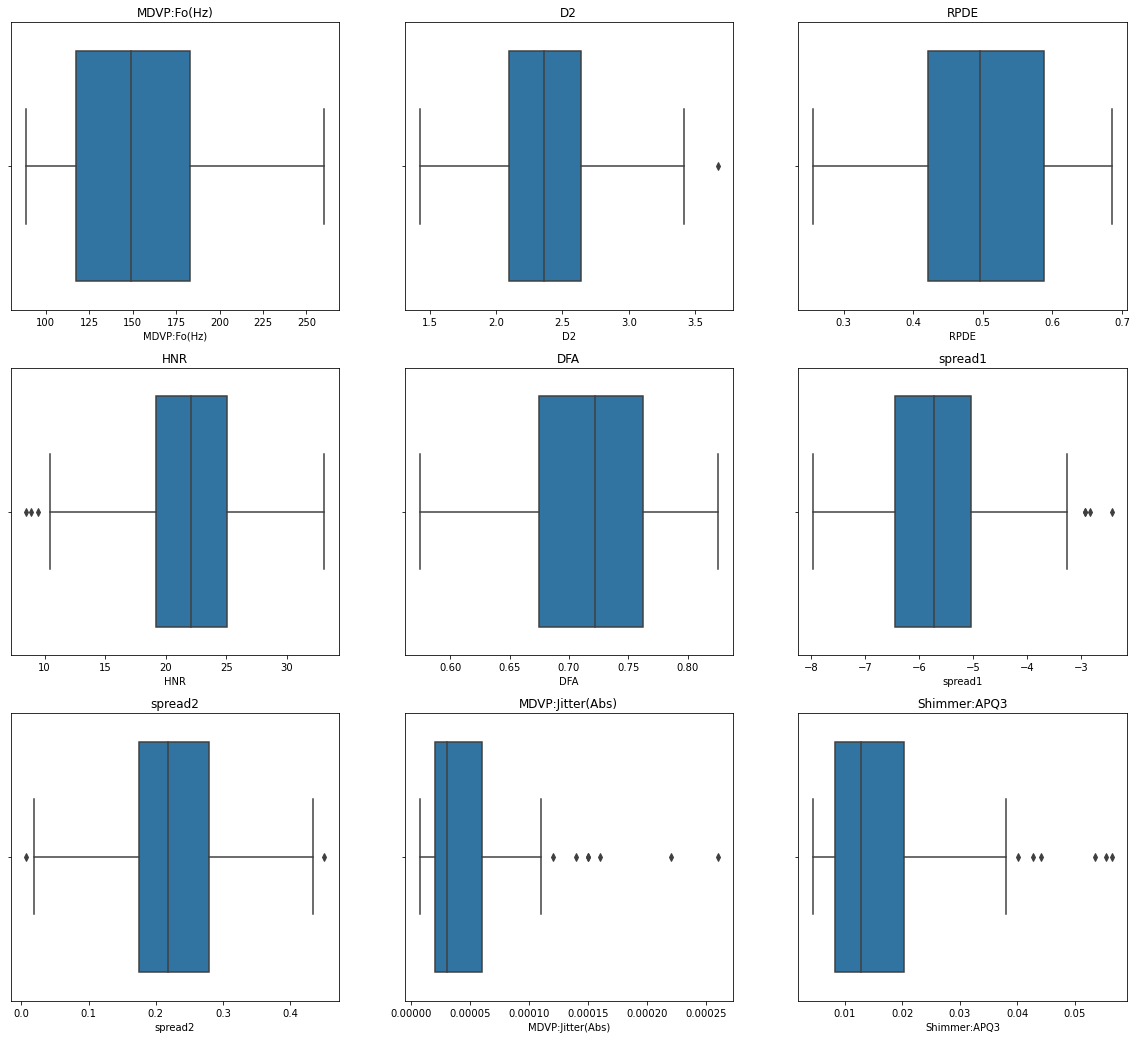

In [17]:
plt.figure(figsize = [20,18])                          #
plt.subplot(3,3,1)
sns.boxplot(df['MDVP:Fo(Hz)'])
plt.title('MDVP:Fo(Hz)',size=12)


plt.subplot(3,3,2)
sns.boxplot(df['D2'])
plt.title('D2',size=12)


plt.subplot(3,3,3)
sns.boxplot(df['RPDE'])
plt.title('RPDE',size=12)


plt.subplot(3,3,4)
sns.boxplot(df['HNR'])
plt.title('HNR',size=12)


plt.subplot(3,3,5)
sns.boxplot(df['DFA'])
plt.title('DFA',size=12)


plt.subplot(3,3,6)
sns.boxplot(df['spread1'])
plt.title('spread1',size=12)


plt.subplot(3,3,7)
sns.boxplot(df['spread2'])
plt.title('spread2',size=12)


plt.subplot(3,3,8)
sns.boxplot(df['MDVP:Jitter(Abs)'])
plt.title('MDVP:Jitter(Abs)',size=12)


plt.subplot(3,3,9)
sns.boxplot(df['Shimmer:APQ3'])
plt.title('Shimmer:APQ3',size=12)

## Data Visualization:

## Univariate Analaysis:

In [18]:
df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.41478,0.81529,-4.81303,0.26648,2.30144,0.28465
1,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.45836,0.81952,-4.07519,0.33559,2.48685,0.36867


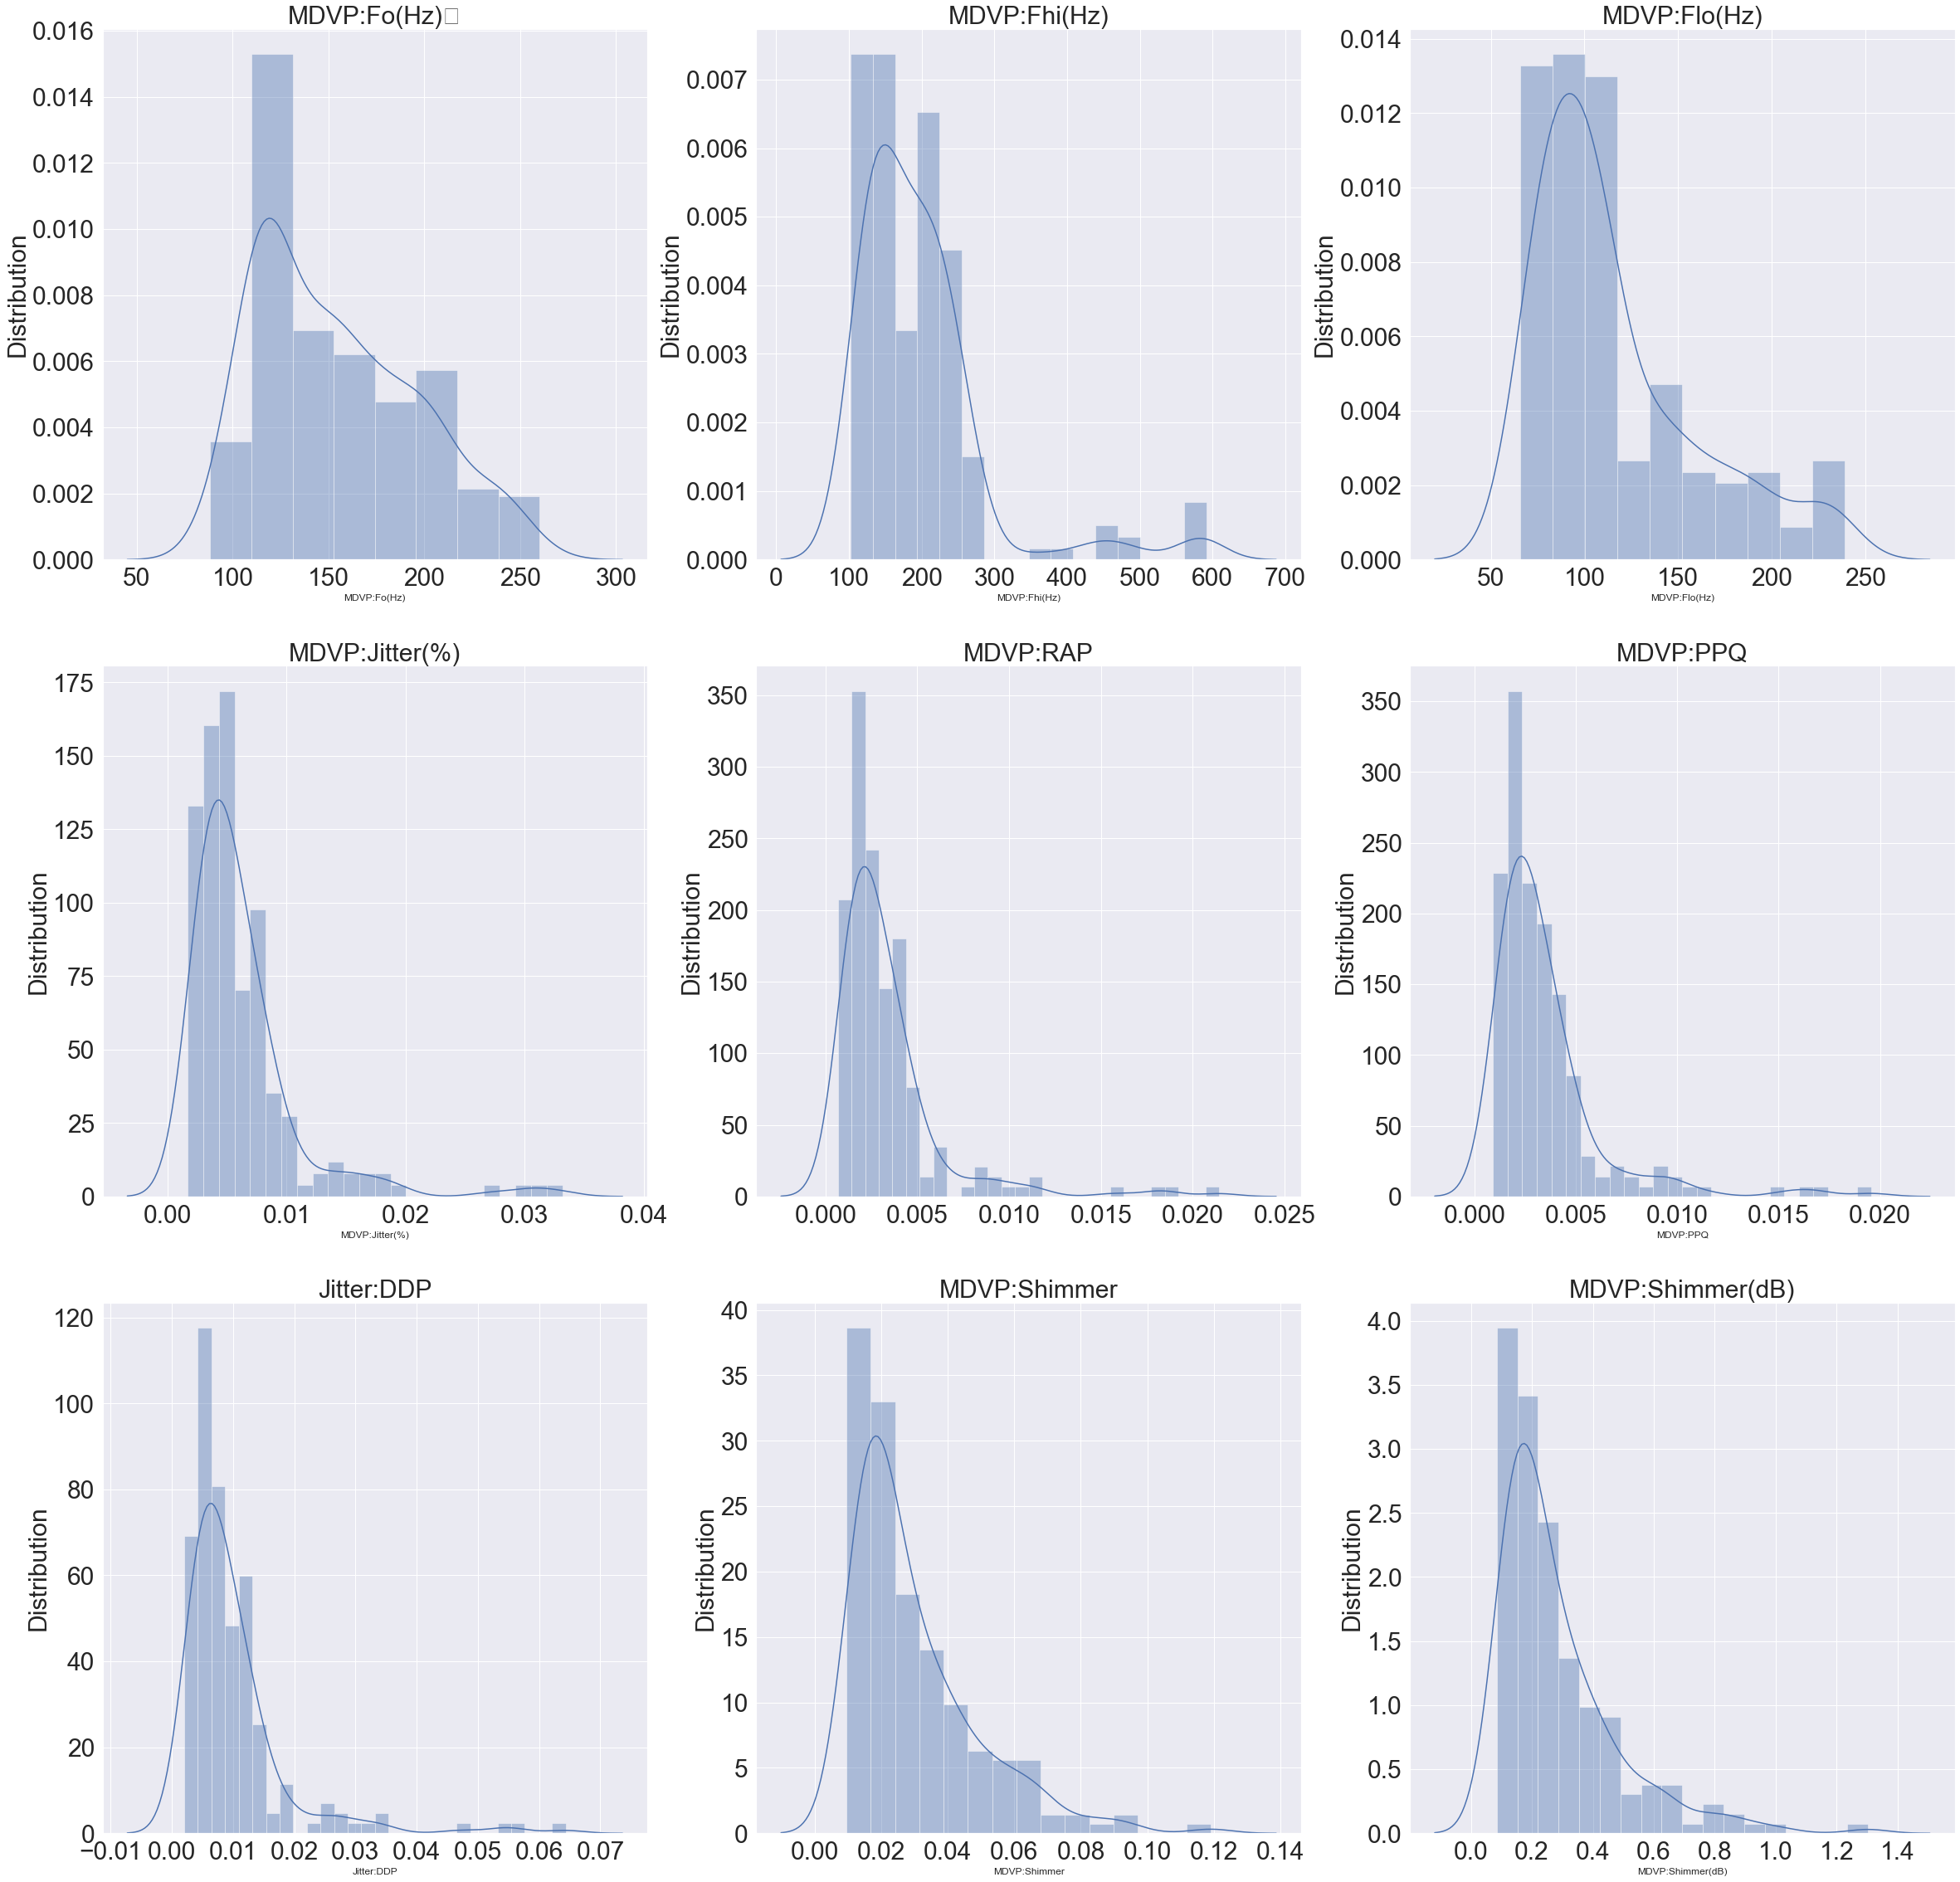

In [19]:
plt.figure(figsize= (40,40))
sns.set_theme(style="darkgrid")

plt.subplot(3,3,1)
sns.distplot(df['MDVP:Fo(Hz)'])
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('MDVP:Fo(Hz)	',size=30)

plt.subplot(3,3,2)
sns.distplot(df['MDVP:Fhi(Hz)'])
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('MDVP:Fhi(Hz)',size=30)

plt.subplot(3,3,3)
sns.distplot(df['MDVP:Flo(Hz)'])
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('MDVP:Flo(Hz)',size=30)


plt.subplot(3,3,4)
sns.distplot(df['MDVP:Jitter(%)'])
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('MDVP:Jitter(%)',size=30)

plt.subplot(3,3,5)
sns.distplot(x=df['MDVP:RAP'])
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('MDVP:RAP',size=30)

plt.subplot(3,3,6)
sns.distplot(df['MDVP:PPQ'])
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('MDVP:PPQ',size=30)


plt.subplot(3,3,7)
sns.distplot(df['Jitter:DDP'])
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('Jitter:DDP',size=30)


plt.subplot(3,3,8)
sns.distplot(df['MDVP:Shimmer'])
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('MDVP:Shimmer',size=30)


plt.subplot(3,3,9)
sns.distplot(df['MDVP:Shimmer(dB)'])
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('MDVP:Shimmer(dB)',size=30)

plt.show()

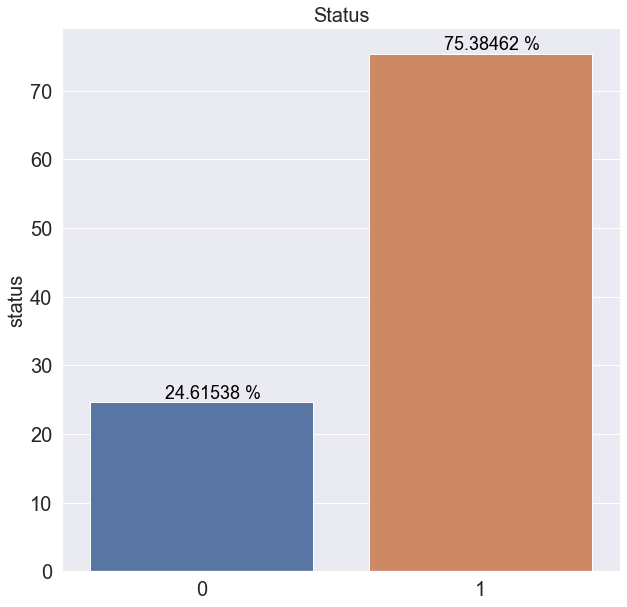

In [20]:
plt.figure(figsize= (10,10))
sns.set_theme(style="darkgrid")
plt.title('Status',size=20)
plt.ylabel('Percentage',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
a=sns.barplot(x=df.status.value_counts(normalize=True).index,y=df.status.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.05f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=18)
plt.show()

In [21]:
# We can see that the data is imbalanced as majority class has 50% more instances than the minority class

## Bivariate Analysis:

Text(0.5, 1.0, 'Shimmer:APQ3')

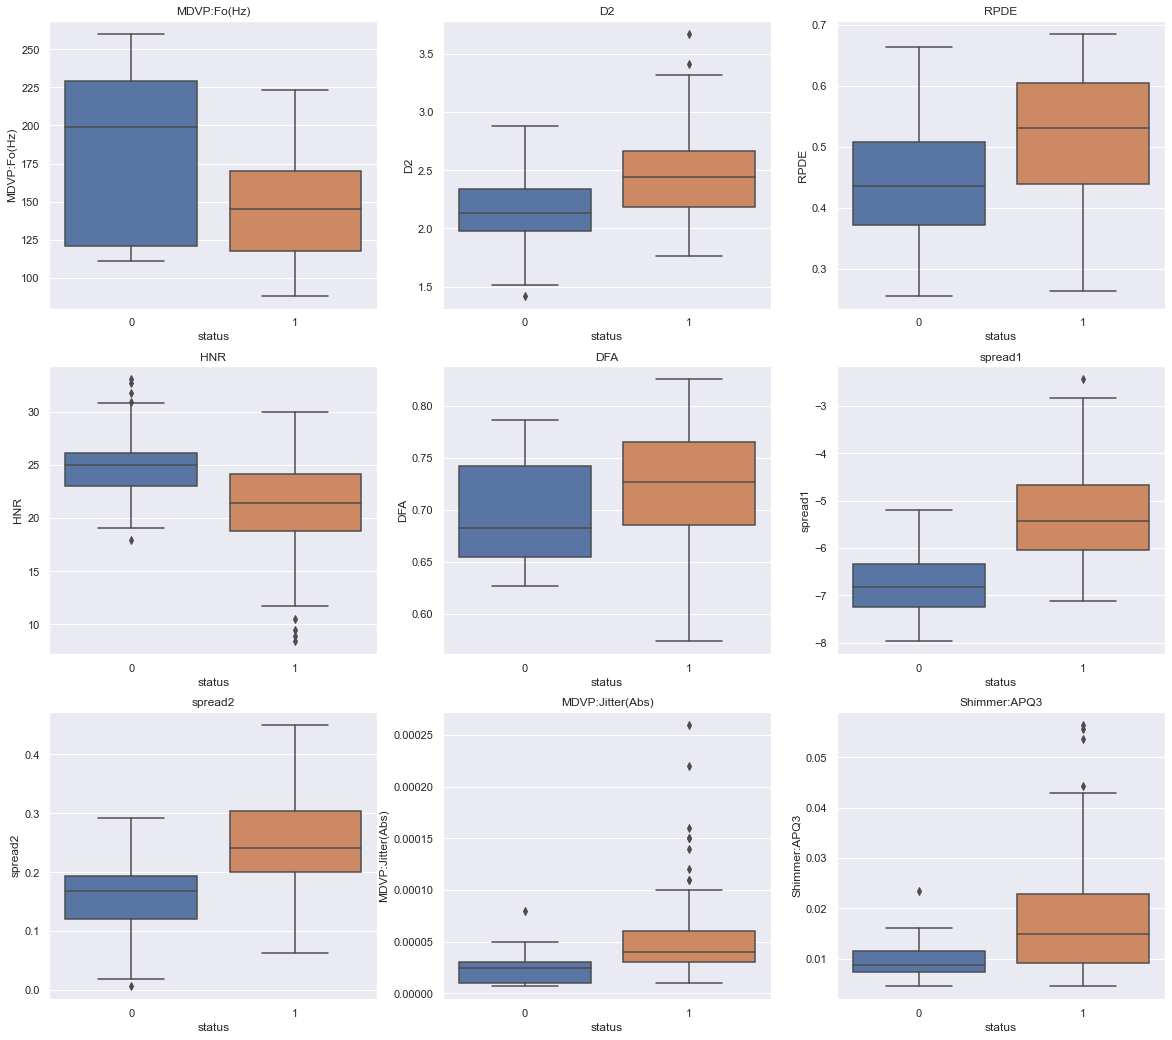

In [22]:
plt.figure(figsize = [20,18])                          #
plt.subplot(3,3,1)
sns.boxplot(x=df.status,y=df['MDVP:Fo(Hz)'])
plt.title('MDVP:Fo(Hz)',size=12)


plt.subplot(3,3,2)
sns.boxplot(x=df.status,y=df['D2'])
plt.title('D2',size=12)


plt.subplot(3,3,3)
sns.boxplot(x=df.status,y=df['RPDE'])
plt.title('RPDE',size=12)


plt.subplot(3,3,4)
sns.boxplot(x=df.status,y=df['HNR'])
plt.title('HNR',size=12)


plt.subplot(3,3,5)
sns.boxplot(x=df.status,y=df['DFA'])
plt.title('DFA',size=12)


plt.subplot(3,3,6)
sns.boxplot(x=df.status,y=df['spread1'])
plt.title('spread1',size=12)


plt.subplot(3,3,7)
sns.boxplot(x=df.status,y=df['spread2'])
plt.title('spread2',size=12)


plt.subplot(3,3,8)
sns.boxplot(x=df.status,y=df['MDVP:Jitter(Abs)'])
plt.title('MDVP:Jitter(Abs)',size=12)


plt.subplot(3,3,9)
sns.boxplot(x=df.status,y=df['Shimmer:APQ3'])
plt.title('Shimmer:APQ3',size=12)

In [23]:
# We can  observe that outliers are more in the healthy instances than in the affected instances.

## Multivariate Analysis:

In [24]:
df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.41478,0.81529,-4.81303,0.26648,2.30144,0.28465
1,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.45836,0.81952,-4.07519,0.33559,2.48685,0.36867


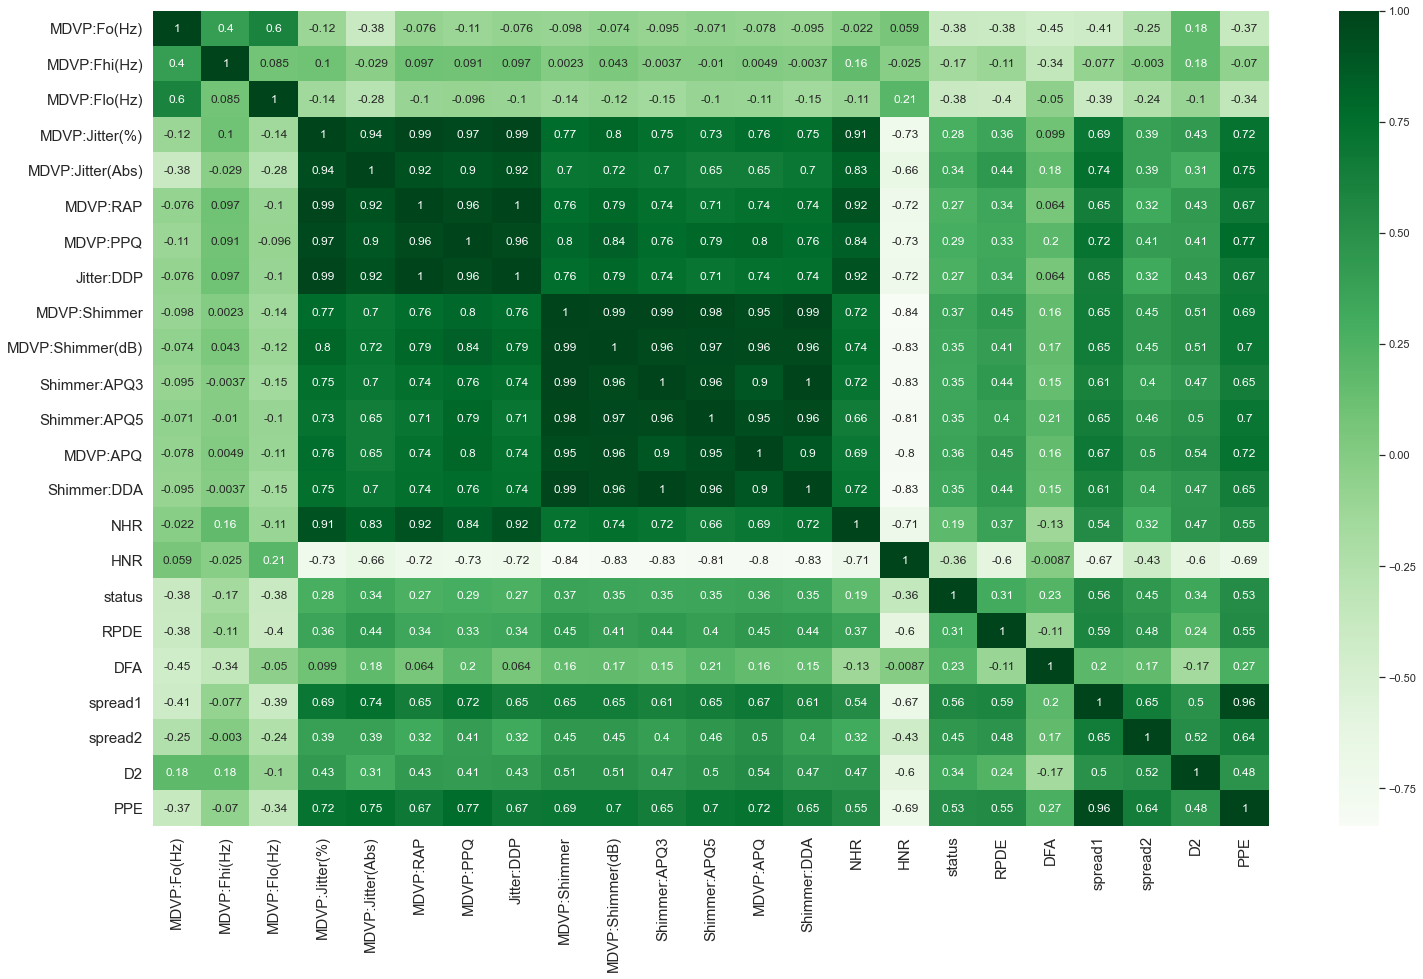

In [25]:
plt.figure(figsize=[25,15])
plt.xticks(size=15)
plt.yticks(size=15)
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

## Data pre processing:

In [26]:
df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.41478,0.81529,-4.81303,0.26648,2.30144,0.28465
1,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.45836,0.81952,-4.07519,0.33559,2.48685,0.36867


In [27]:
#There are no categorical variables to create dummy variables..

## Train and Test datasets

In [28]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.41478,0.81529,-4.81303,0.26648,2.30144,0.28465
1,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.45836,0.81952,-4.07519,0.33559,2.48685,0.36867
2,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,1,0.42990,0.82529,-4.44318,0.31117,2.34226,0.33263
3,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,0.02924,0.04005,0.03772,0.08771,0.01353,20.64400,1,0.43497,0.81924,-4.11750,0.33415,2.40555,0.36897
4,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,0.03490,0.04825,0.04465,0.10470,0.01767,19.64900,1,0.41736,0.82348,-3.74779,0.23451,2.33218,0.41034


In [29]:
X=df.drop(['status'],axis=1)

y=df.status
  
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=100)

In [30]:
print(X_train.shape)
print(y_train.shape)             # checking if the shapes of train and test sets are compatible.
print(X_test.shape)
print(y_test.shape)

(136, 22)
(136,)
(59, 22)
(59,)


## Normalization

In [31]:
s=StandardScaler()

In [32]:
columns=X_train.columns  # seperating numerical columns for scaling.

X_train[columns] = s.fit_transform(X_train[columns]) 

In [33]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
3,-0.90604,-0.64176,-0.13276,0.88384,1.36317,0.68300,1.45917,0.68168,1.48295,1.42329,1.42732,2.06773,1.03294,1.42698,-0.22439,-0.35047,-0.60080,1.85741,1.53876,1.36893,0.10545,1.89479
185,-0.91541,-0.19162,-0.45412,-0.60607,-0.35156,-0.61244,-0.53630,-0.61133,-0.76499,-0.78404,-0.88398,-0.69245,-0.46148,-0.88399,-0.37882,0.50557,0.99942,-1.14835,0.12101,-1.26148,-0.90054,0.11687
26,0.40028,0.16261,-0.93409,-0.29849,-0.35156,-0.20410,-0.37067,-0.20419,-0.53493,-0.49437,-0.65664,-0.52858,-0.33150,-0.65699,-0.28907,0.91710,-0.76075,0.06532,-0.44702,-0.04814,0.63948,-0.65283
120,-0.61135,3.26151,-0.64922,-0.02363,0.22002,-0.23578,-0.05518,-0.23587,-0.51089,-0.29159,-0.69760,-0.57618,-0.43060,-0.69727,0.02555,0.63657,-0.08430,-0.60519,-0.44946,0.65673,0.91944,-0.59506
123,0.66404,0.03541,-0.85173,0.54572,0.22002,0.69709,0.47721,0.69576,-0.22761,-0.23366,-0.16202,-0.15231,-0.28913,-0.16236,-0.10908,-0.79836,0.91568,0.28381,0.26272,-1.14917,-0.56516,0.13081


In [34]:
X_test[columns] = s.transform(X_test[columns])
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
164,-1.25212,-0.58513,-0.70170,0.68752,1.36317,0.65132,0.52453,0.65235,-0.04963,0.00388,0.04996,-0.17703,-0.18716,0.04962,0.40961,-0.87951,1.71236,-0.77959,2.68071,2.19129,0.55457,1.87477
188,-0.95681,-0.85533,-0.68506,-0.57771,-0.35156,-0.57020,-0.56785,-0.56909,-0.98188,-0.95785,-0.99663,-0.93871,-0.88948,-0.99629,-0.38734,0.64428,0.57662,-1.06084,-0.95319,-1.05422,-1.32008,-0.94748
146,0.36983,-0.02642,0.76286,2.12943,1.36317,1.95381,2.43719,1.95357,3.00009,3.18452,2.32849,3.36862,4.64943,2.32816,1.32413,-2.34551,0.63833,1.38849,2.32673,2.42791,3.02892,2.91303
126,-0.39017,0.03615,-0.80868,-0.10434,-0.06577,-0.04921,-0.00391,-0.04813,-0.06279,-0.14676,-0.04733,0.05367,-0.05358,-0.04767,-0.11384,-0.94429,1.24104,0.38118,0.17121,-1.87566,-1.58889,0.11376
151,0.92355,0.34664,1.15033,5.48664,3.36370,5.25228,6.42814,5.25298,5.15474,5.97121,4.21583,5.67014,8.21851,4.21619,4.87970,-3.28897,1.26704,0.92937,3.15680,2.89736,2.05908,3.71598


## Data Modeling:

In [35]:
metrics_df=pd.DataFrame(columns=['Accuracy','Precision','AUC_ROC Curve'])

def custom_metrics(a,p,method):
    from sklearn import metrics
    confusion = metrics.confusion_matrix(a,p)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    met=[]

    acc=round((TP+TN)/(TP+TN+FP+FN),2)
    prec=round(TP /(TP+FP),2)
    auc=round(metrics.roc_auc_score(a,p),2)
    met.append([acc,prec,auc])
    metrics_df.loc[method]=met[0]
    return metrics_df.tail(2)

    
# custom function for plotting a ROC Curve.
def draw_roc( actual, probs ):           
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

# Decision Tree

In [36]:
dt = DecisionTreeClassifier(max_depth=3,max_features=5)    # simple decision tree model with out hyperparameter tuning
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=5)

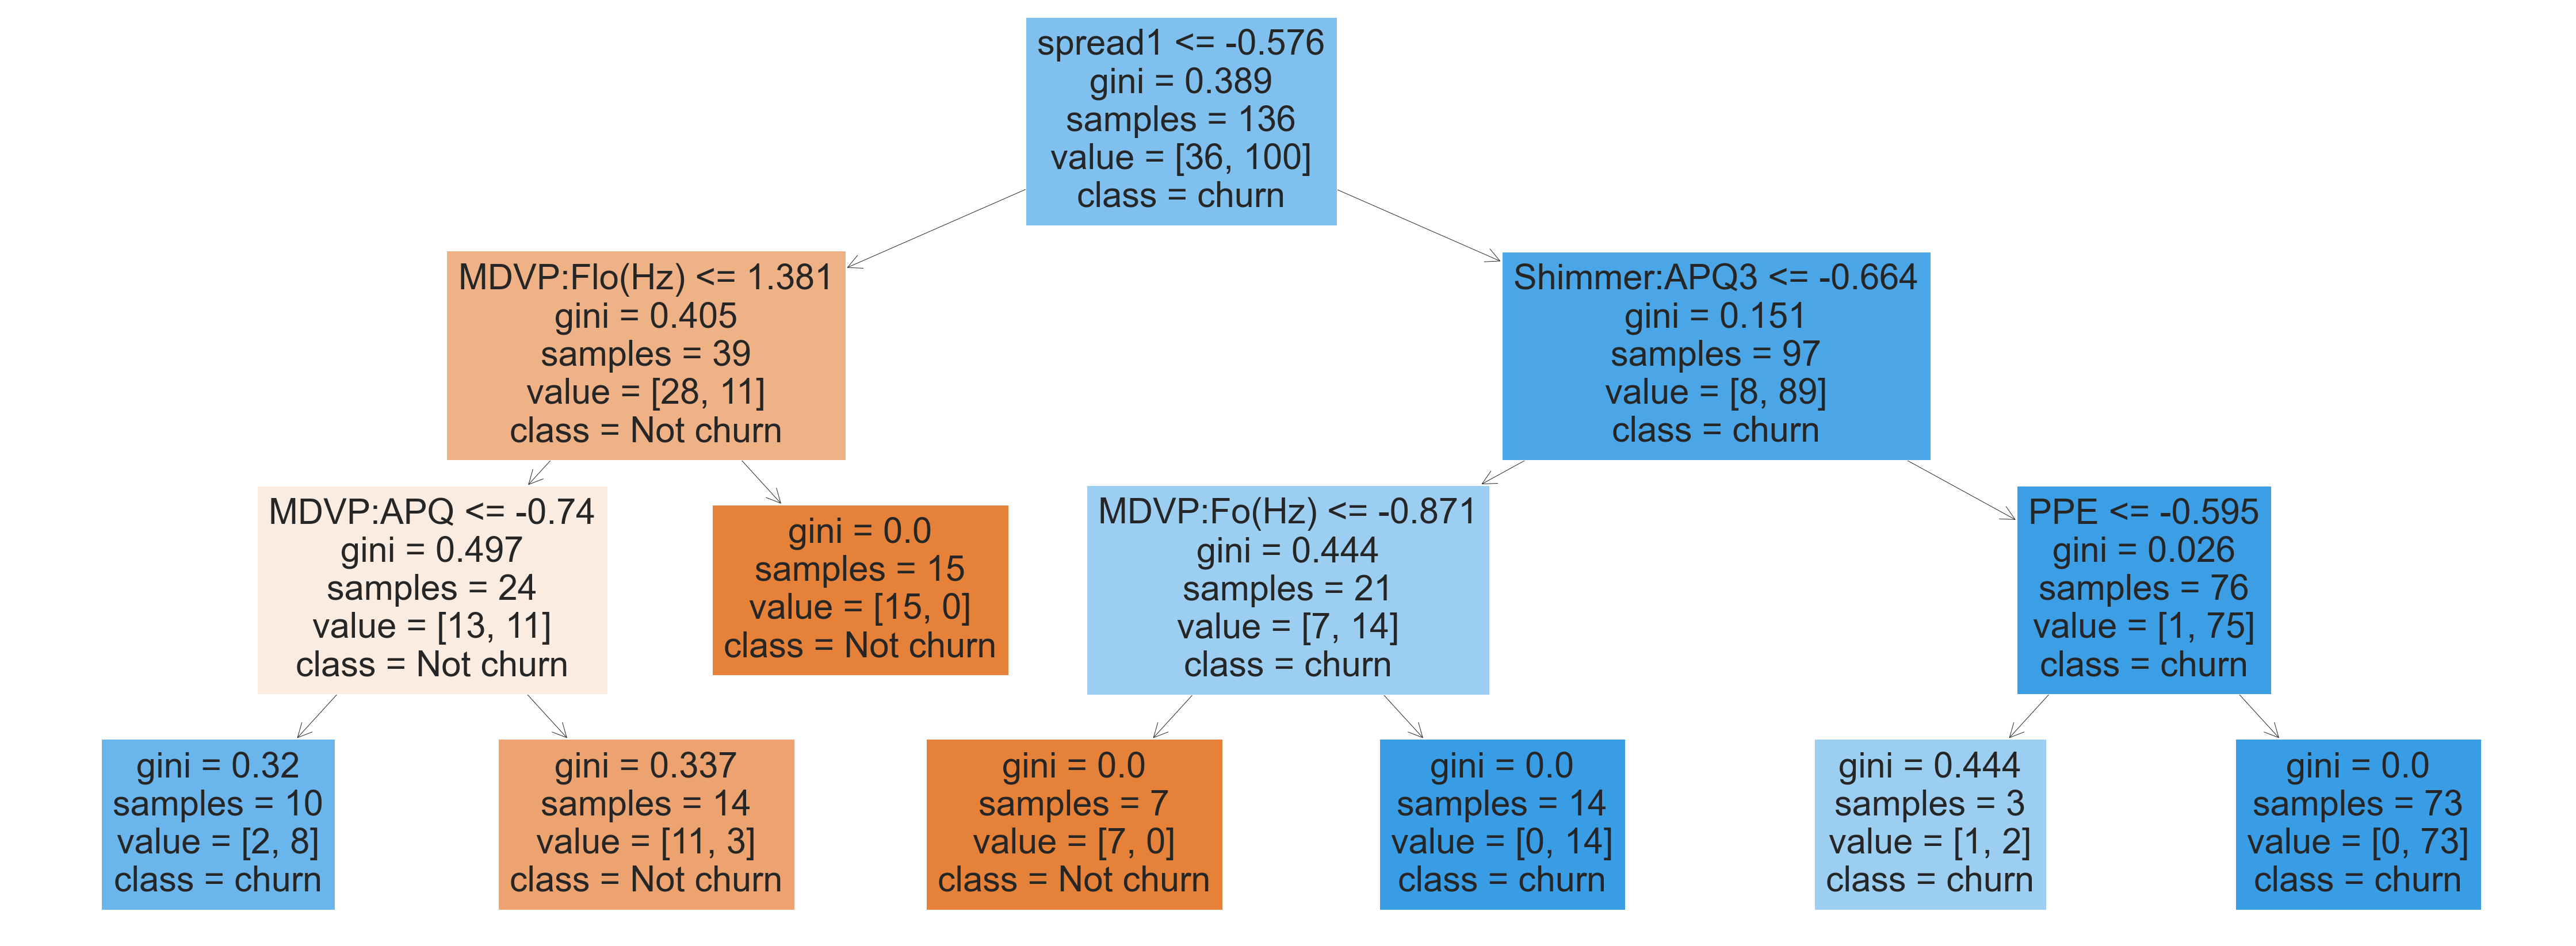

In [37]:
plt.figure(figsize=[80,30])                     # Plotting decision tree.
plot_tree(dt,feature_names=X.columns,class_names=['Not churn','churn'],filled=True)
plt.show()

#### Train set predictions

In [38]:
y_train_predictions=dt.predict(X_train)

custom_metrics(y_train,y_train_predictions,'Decision_Tree_Train')

,Accuracy,Precision,AUC_ROC Curve
Decision_Tree_Train,0.96000,0.97000,0.94000


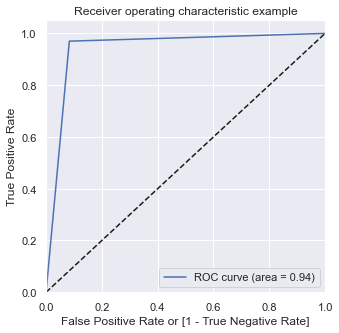

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predictions, drop_intermediate = False )
draw_roc(y_train,y_train_predictions)

#### Test set predictions

In [40]:
y_test_predictions=dt.predict(X_test)

custom_metrics(y_test,y_test_predictions,'Decision_Tree_Test')

,Accuracy,Precision,AUC_ROC Curve
Decision_Tree_Train,0.96000,0.97000,0.94000
Decision_Tree_Test,0.85000,0.91000,0.78000


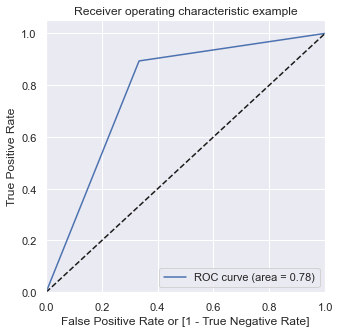

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predictions, drop_intermediate = False )
draw_roc(y_test,y_test_predictions)

In [42]:
# As we can see from the results dataframe, Decision Tree model is clearly overfitting as the difference in metrics from train to test dataset is huge.

## Random Forest:

In [43]:
classifier_rf = RandomForestClassifier(n_estimators=3,max_depth=3,max_features=5,random_state=42)     

classifier_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=5, n_estimators=3,
                       random_state=42)

### Train Set predictions:

In [44]:
y_train_predicted=classifier_rf.predict(X_train)

custom_metrics(y_train,y_train_predicted,'Random_Forest Train')

,Accuracy,Precision,AUC_ROC Curve
Decision_Tree_Test,0.85000,0.91000,0.78000
Random_Forest Train,0.93000,0.96000,0.91000


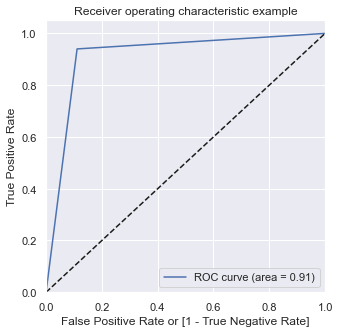

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predicted, drop_intermediate = False )
draw_roc(y_train,y_train_predicted)

### Test set predictions

In [46]:
y_test_predicted=classifier_rf.predict(X_test)

custom_metrics(y_test,y_test_predicted,'Random_Forest Test')

,Accuracy,Precision,AUC_ROC Curve
Random_Forest Train,0.93000,0.96000,0.91000
Random_Forest Test,0.85000,0.95000,0.84000


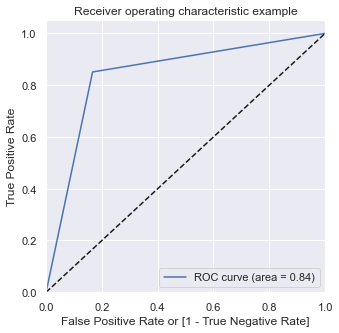

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predicted, drop_intermediate = False )
draw_roc(y_test,y_test_predicted)

In [48]:
metrics_df

,Accuracy,Precision,AUC_ROC Curve
Decision_Tree_Train,0.96000,0.97000,0.94000
Decision_Tree_Test,0.85000,0.91000,0.78000
Random_Forest Train,0.93000,0.96000,0.91000
Random_Forest Test,0.85000,0.95000,0.84000


### Naive Bayes classifiers

In [49]:
naive_bayes = GaussianNB()


naive_bayes.fit(X_train,y_train)

GaussianNB()

#### Train set predictions

In [50]:
y_train_pred=naive_bayes.predict(X_train)

In [51]:
custom_metrics(y_train,y_train_pred,'Naive_Bayes Train')

,Accuracy,Precision,AUC_ROC Curve
Random_Forest Test,0.85000,0.95000,0.84000
Naive_Bayes Train,0.74000,0.98000,0.81000


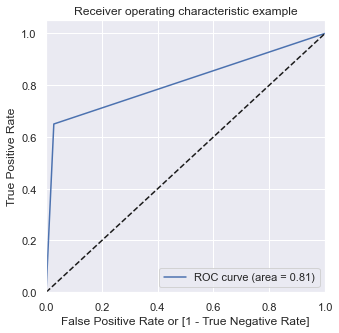

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_pred, drop_intermediate = False )
draw_roc(y_train,y_train_pred)

#### Test set predictions

In [53]:
y_test_pred=naive_bayes.predict(X_test)

In [54]:
y_test_pred=naive_bayes.predict(X_test)

custom_metrics(y_test,y_test_pred,'Naive_Bayes Test')

,Accuracy,Precision,AUC_ROC Curve
Naive_Bayes Train,0.74000,0.98000,0.81000
Naive_Bayes Test,0.64000,0.88000,0.65000


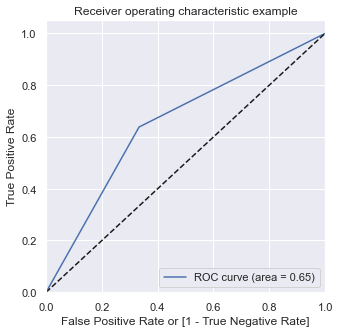

In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred, drop_intermediate = False )
draw_roc(y_test,y_test_pred)

In [56]:
metrics_df

,Accuracy,Precision,AUC_ROC Curve
Decision_Tree_Train,0.96000,0.97000,0.94000
Decision_Tree_Test,0.85000,0.91000,0.78000
Random_Forest Train,0.93000,0.96000,0.91000
Random_Forest Test,0.85000,0.95000,0.84000
Naive_Bayes Train,0.74000,0.98000,0.81000
Naive_Bayes Test,0.64000,0.88000,0.65000


## SVM:

In [57]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

# Trained the model
svm.fit(X_train,y_train)

SVC(gamma=0.5)

#### Train set predictions

In [58]:
y_train_pred=svm.predict(X_train)

In [59]:
custom_metrics(y_train,y_train_pred,'SVM Train')

,Accuracy,Precision,AUC_ROC Curve
Naive_Bayes Test,0.64000,0.88000,0.65000
SVM Train,1.00000,1.00000,1.00000


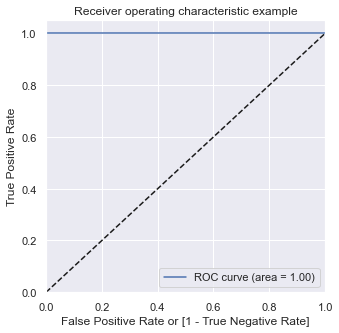

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_pred, drop_intermediate = False )
draw_roc(y_train,y_train_pred)

#### Test set predictions

In [61]:
y_test_pred=svm.predict(X_test)

In [62]:
y_test_pred=svm.predict(X_test)

custom_metrics(y_test,y_test_pred,'SVM Test')

,Accuracy,Precision,AUC_ROC Curve
SVM Train,1.00000,1.00000,1.00000
SVM Test,0.86000,0.87000,0.70000


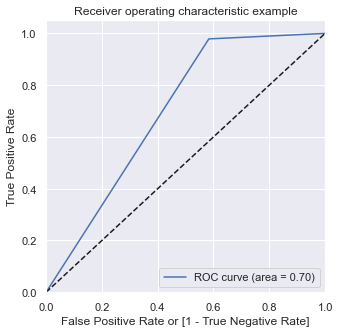

In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred, drop_intermediate = False )
draw_roc(y_test,y_test_pred)

In [64]:
metrics_df.reset_index().rename(columns={'index':'Model'})

,Model,Accuracy,Precision,AUC_ROC Curve
0,Decision_Tree_Train,0.96000,0.97000,0.94000
1,Decision_Tree_Test,0.85000,0.91000,0.78000
2,Random_Forest Train,0.93000,0.96000,0.91000
3,Random_Forest Test,0.85000,0.95000,0.84000
4,Naive_Bayes Train,0.74000,0.98000,0.81000
5,Naive_Bayes Test,0.64000,0.88000,0.65000
6,SVM Train,1.00000,1.00000,1.00000
7,SVM Test,0.86000,0.87000,0.70000


As we can see in the above cell,

Decision tree, Random forest, SVN models are overfitting as the difference between train and test dataset matrics is huge.

Naive Bayes model has an Accuracy of 74% and 64% indicating that the model is underfitting.

## Neural Network:

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras import regularizers
from keras.metrics import AUC
from keras.metrics import Precision
from keras import backend as K
from keras.optimizers import Optimizer

In [66]:
def cust_function_input(x,exp_scale=1.0,sin_scale=1):
  
    """
     This is a custom activation function used in input/hidden layer in Nueral network to adjust the weights.

    Parameters:
    - x: Input weight
    - exp_scale: Scaling factor for exponential term.
    - sin_scale: Scaling factor for Sin term.

    Returns:
    - Outut are pdated weights after applying the custom activation.
    """

    exp_part = exp_scale * K.exp(-1 * K.abs(x))
    sine_part = sin_scale * K.sin(x)
    sqrt_part = K.sqrt(K.abs(x))
    
    return exp_part+sine_part-sqrt_part

In [67]:
def cust_function_output(x,tanh_scale=1.0,sigmoid_scale=0.5):
    
    """
     This is a custom activation function used in output layer for binary classification.

    Parameters:
    - x: Input weight
    - tanh_scale: Scaling factor for tanh.
    - selu_scale: Scaling factor for Scaled Exponential Linear Unit.

    Returns:
    - Output after applying the custom activation.
    """
    
    tanh_part = tanh_scale * K.tanh(x)
    sigmoid_part = K.sigmoid(sigmoid_scale * tanh_part)

    return  sigmoid_part

In [68]:
# Create a Sequential model

nn_model = Sequential()

nn_model.add(Dense(1024, input_dim=22, activation=cust_function_input))
#nn_model.add(Dropout(0.2))

nn_model.add(Dense(1024,  activation=cust_function_input))
#nn_model.add(Dropout(0.2))

nn_model.add(Dense(1024,  activation=cust_function_input))
#nn_model.add(Dropout(0.2))

nn_model.add(Dense(1024,  activation=cust_function_input))
#nn_model.add(Dropout(0.2))

nn_model.add(Dense(1024, activation=cust_function_input))
#nn_model.add(Dropout(0.2))


# Output layer for binary classification with a softmax activation function
nn_model.add(Dense(1, activation=cust_function_output))

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              23552     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 4,222,977
Trainable params: 4,222,977
Non-trainable params: 0
______________________________________________

Now, to fit the model on the training input and training target dataset, we run the following command using a minibatch of size 10 and 10 epochs.

In [69]:
# compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',Precision(),AUC()])

# fit the model with the data
history=nn_model.fit(X_train, y_train, epochs=25,batch_size=30)
print("--------------------------------")

Epoch 1/25
5/5 [==============================] - 7s 25ms/step - loss: 0.6334 - accuracy: 0.7020 - precision: 0.7289 - auc: 0.5959
Epoch 2/25
5/5 [==============================] - 0s 25ms/step - loss: 0.6045 - accuracy: 0.7391 - precision: 0.7391 - auc: 0.5000
Epoch 3/25
5/5 [==============================] - 0s 23ms/step - loss: 0.6036 - accuracy: 0.7409 - precision: 0.7409 - auc: 0.5000
Epoch 4/25
5/5 [==============================] - 0s 22ms/step - loss: 0.6041 - accuracy: 0.7400 - precision: 0.7400 - auc: 0.5000
Epoch 5/25
5/5 [==============================] - 0s 23ms/step - loss: 0.6124 - accuracy: 0.7233 - precision: 0.7233 - auc: 0.5000
Epoch 6/25
5/5 [==============================] - 0s 22ms/step - loss: 0.6231 - accuracy: 0.7020 - precision: 0.7020 - auc: 0.5000
Epoch 7/25
5/5 [==============================] - 0s 18ms/step - loss: 0.5960 - accuracy: 0.7562 - precision: 0.7562 - auc: 0.5000
Epoch 8/25
5/5 [==============================] - 0s 20ms/step - loss: 0.6166 - acc

In [70]:
scores_train = nn_model.evaluate(X_train, y_train)

5/5 [==============================] - 3s 10ms/step - loss: 0.6064 - accuracy: 0.7353 - precision: 0.7353 - auc: 0.5000


In [71]:
y_pred_train=nn_model.predict(X_train)

#### Test set predictions

In [72]:
y_test_pred=nn_model.predict(X_test)

In [73]:
scores_test = nn_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 17ms/step - loss: 0.5758 - accuracy: 0.7966 - precision: 0.7966 - auc: 0.5000


In [74]:
print("loss on test dataset: ", scores_train[0])
print("----------------------------")
print("Accuracy on test dataset: ", scores_train[1])
print("----------------------------")
print("Precision on test dataset: ", scores_train[2])
print("----------------------------")
print("AUC Score on test dataset: ", scores_train[3])
print("----------------------------")


print("loss on test dataset: ", scores_test[0])
print("----------------------------")
print("Accuracy on test dataset: ", scores_test[1])
print("----------------------------")
print("Precision on test dataset: ", scores_test[2])
print("----------------------------")
print("AUC Score on test dataset: ", scores_test[3])
print("----------------------------")

loss on test dataset:  0.606429934501648
----------------------------
Accuracy on test dataset:  0.7352941036224365
----------------------------
Precision on test dataset:  0.7352941036224365
----------------------------
AUC Score on test dataset:  0.5
----------------------------
loss on test dataset:  0.5757719278335571
----------------------------
Accuracy on test dataset:  0.7966101765632629
----------------------------
Precision on test dataset:  0.7966101765632629
----------------------------
AUC Score on test dataset:  0.5
----------------------------


 We have used two custom activation functions one for Input and hidden layers whereas another one for the output layer...
 
Neural Network has produced consistent results on both train and test dataset indicating that the model is stable but has failed to produce good AUC score.